In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b76abafcf54e80b5a965d6f5ad7d607


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.    
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | yarensk
Processing Record 3 of Set 1 | kashi
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | manzil kamil
Processing Record 6 of Set 1 | nuuk
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | tahara
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | axim
Processing Record 13 of Set 1 | levelland
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | gangotri
City not found. Skipping...
Processing Record 16 of Set 1 | sept-iles
Processing Record 17 of Set 1 | broken hill
Processing Record 18 of Set 1 | jumla
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | ossora
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | bandundu
Processing Record 23 o

City not found. Skipping...
Processing Record 42 of Set 4 | bahia blanca
Processing Record 43 of Set 4 | kopychyntsi
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | nampula
Processing Record 46 of Set 4 | marystown
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 4 | yagodnoye
Processing Record 50 of Set 4 | bosaso
Processing Record 1 of Set 5 | rudnyy
Processing Record 2 of Set 5 | bairiki
Processing Record 3 of Set 5 | ilhabela
Processing Record 4 of Set 5 | ayan
Processing Record 5 of Set 5 | shiyan
Processing Record 6 of Set 5 | huilong
Processing Record 7 of Set 5 | san policarpo
Processing Record 8 of Set 5 | griffith
Processing Record 9 of Set 5 | krasnovishersk
Processing Record 10 of Set 5 | ufimskiy
Processing Record 11 of Set 5 | belmonte
Processing Record 12 of Set 5 | chegutu
Processing Record 13 of Set 5 | namatanai
Processing Record 14 of Set 5 | teano
Proc

Processing Record 31 of Set 8 | itaituba
Processing Record 32 of Set 8 | papagaios
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | yokadouma
Processing Record 35 of Set 8 | labrea
Processing Record 36 of Set 8 | masallatah
Processing Record 37 of Set 8 | zhicheng
Processing Record 38 of Set 8 | borlange
City not found. Skipping...
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | allada
Processing Record 41 of Set 8 | amga
Processing Record 42 of Set 8 | felipe carrillo puerto
Processing Record 43 of Set 8 | piacabucu
Processing Record 44 of Set 8 | aleksin
Processing Record 45 of Set 8 | kinkala
Processing Record 46 of Set 8 | mrirt
City not found. Skipping...
Processing Record 47 of Set 8 | dakar
Processing Record 48 of Set 8 | masjed-e soleyman
City not found. Skipping...
Processing Record 49 of Set 8 | ryazan
Processing Record 50 of Set 8 | itarema
Processing Record 1 of Set 9 | irupi
Processing Record 2 of Set 9 | tagusao
Processing Rec

Processing Record 18 of Set 12 | lazaro cardenas
Processing Record 19 of Set 12 | qaqortoq
Processing Record 20 of Set 12 | opuwo
Processing Record 21 of Set 12 | falmouth
Processing Record 22 of Set 12 | kampot
Processing Record 23 of Set 12 | mocuba
Processing Record 24 of Set 12 | caravelas
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | mount isa
Processing Record 27 of Set 12 | imbituba
Processing Record 28 of Set 12 | nueva loja
Processing Record 29 of Set 12 | khorixas
Processing Record 30 of Set 12 | kristiansund
Processing Record 31 of Set 12 | west wendover
Processing Record 32 of Set 12 | susanville
Processing Record 33 of Set 12 | vuktyl
Processing Record 34 of Set 12 | alpena
Processing Record 35 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 12 | saint marys
Processing Record 37 of Set 12 | alappuzha
Processing Record 38 of Set 12 | mweka
Processing Record 39 of Set 12 | aksarka
Processing Record 40 of Set 12 

In [18]:
len(city_data)

577

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,64.40,82,75,20.71,PT,2021-04-04 15:30:43
1,Yarensk,62.1675,49.0916,23.68,92,79,2.26,RU,2021-04-04 15:30:44
2,Kashi,39.4547,75.9797,48.20,57,75,2.24,CN,2021-04-04 15:30:44
3,Cape Town,-33.9258,18.4232,73.99,68,20,13.80,ZA,2021-04-04 15:25:51
4,Manzil Kamil,35.6248,10.6673,68.00,52,100,10.36,TN,2021-04-04 15:30:44
5,Nuuk,64.1835,-51.7216,33.73,96,100,43.13,GL,2021-04-04 15:30:45
6,Port Alfred,-33.5906,26.8910,69.01,75,0,10.89,ZA,2021-04-04 15:30:45
7,Khatanga,71.9667,102.5000,-16.20,91,11,6.06,RU,2021-04-04 15:30:45
8,Bengkulu,-3.8004,102.2655,78.04,84,100,10.04,ID,2021-04-04 15:27:05
9,Tahara,34.6667,137.2667,61.00,74,100,1.01,JP,2021-04-04 15:30:46


In [21]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-04-04 15:30:43,38.5167,-28.7000,64.40,82,75,20.71
1,Yarensk,RU,2021-04-04 15:30:44,62.1675,49.0916,23.68,92,79,2.26
2,Kashi,CN,2021-04-04 15:30:44,39.4547,75.9797,48.20,57,75,2.24
3,Cape Town,ZA,2021-04-04 15:25:51,-33.9258,18.4232,73.99,68,20,13.80
4,Manzil Kamil,TN,2021-04-04 15:30:44,35.6248,10.6673,68.00,52,100,10.36
...,...,...,...,...,...,...,...,...,...
572,Jeremoabo,BR,2021-04-04 15:33:12,-10.0750,-38.4808,95.45,25,26,10.54
573,Ust-Ilimsk,RU,2021-04-04 15:33:12,58.0006,102.6619,24.93,98,100,1.74
574,Margate,GB,2021-04-04 15:28:46,51.3813,1.3862,55.99,58,39,3.00
575,Krasnoborsk,RU,2021-04-04 15:33:13,61.5598,45.9340,29.21,92,83,3.09


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


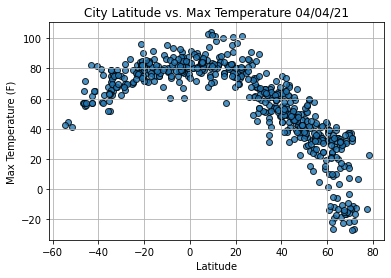

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

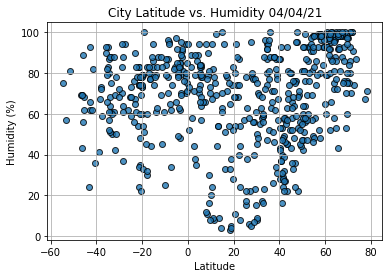

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

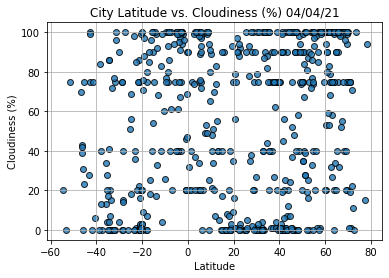

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

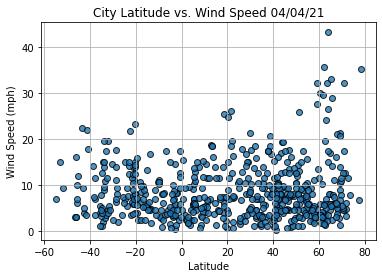

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()